## Library

In [2]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

## Dataset

In [3]:
df = pd.read_csv(os.getcwd() + '/dataset/clean_creditcard.csv')
df.tail(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class_Category,Stan_Amount
879,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,1,-0.041844
880,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,1,0.619997
881,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,1,-0.181887


## Modeling

In [4]:
rf_obj = RandomForestClassifier(n_estimators=200)
rf_obj

RandomForestClassifier(n_estimators=200)

In [5]:
X = df.drop(['Class_Category'], axis=1)
y = df[['Class_Category']]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
rf_obj.fit(X_train, y_train.values.ravel())

RandomForestClassifier(n_estimators=200)

In [9]:
y_pred = rf_obj.predict(X_test)

## Accuracy


In [10]:
print(metrics.accuracy_score(y_test,y_pred))

0.9509433962264151


## Postive & Negative Rates

In [11]:
P = sum(y_test.values.ravel())
print("Total Positive Samples (P):", P)

TP = sum((y_test.values.ravel() == 1) & (y_pred == 1))
print("True Positives (TP):", TP)

TPR = TP / P
print("True Positive Rate (TPR):", TPR)

FN = sum((y_test.values.ravel() == 1) & (y_pred == 0))
print("False Negatives (FN):", FN)

FNR = FN / P
print("False Negative Rate (FNR):", FNR)

N = sum(y_test.values.ravel() == 0)
print("Total Negative Samples (N):", N)

TN = sum((y_test.values.ravel() == 0) & (y_pred == 0))
print("True Negatives (TN):", TN)

FP = sum((y_test.values.ravel() == 0) & (y_pred == 1))
print("False Positives (FP):", FP)

TNR = TN / N
FPR = FP / N
print('True Negative Rate (TNR): {} and False Positive Rate (FPR): {}'.format(TNR, FPR))

Total Positive Samples (P): 130
True Positives (TP): 120
True Positive Rate (TPR): 0.9230769230769231
False Negatives (FN): 10
False Negative Rate (FNR): 0.07692307692307693
Total Negative Samples (N): 135
True Negatives (TN): 132
False Positives (FP): 3
True Negative Rate (TNR): 0.9777777777777777 and False Positive Rate (FPR): 0.022222222222222223


## Confusion Matrix

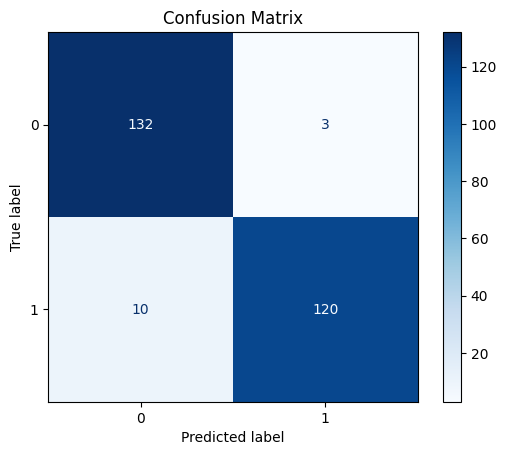

In [12]:
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap=plt.cm.Blues) 
plt.title('Confusion Matrix')
plt.show()

## Classification Report

In [13]:
print(f"Classification Report : \n {classification_report(y_test, y_pred)}")

Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       135
           1       0.98      0.92      0.95       130

    accuracy                           0.95       265
   macro avg       0.95      0.95      0.95       265
weighted avg       0.95      0.95      0.95       265

